(96453, 12)


C:\Users\DELL\AppData\Local\Temp\ipykernel_17804\17487374.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['diff_temperature'] = df_train['Temperature (C)'] - temperature_mean
C:\Users\DELL\AppData\Local\Temp\ipykernel_17804\17487374.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['diff_windspeed'] = df_train['Wind Speed (km/h)'] - windspeed_mean
C:\Users\DELL\AppData\Local\Temp\ipykernel_17804\17487374.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

10.74450445740538 0.005782962670853067


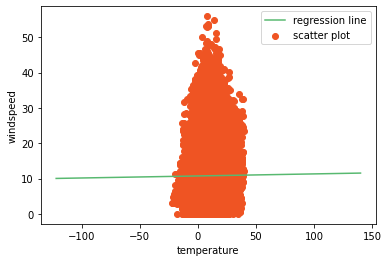

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

dataset = pd.read_csv('weatherHistory.csv')
print(dataset.shape)
dataset.head()

randomseed = 29
dataset_shuffled = dataset.sample(frac=1, random_state=randomseed)
train_proportion = 0.8

train_rows = int(len(dataset_shuffled) * train_proportion)
test_rows = len(dataset_shuffled) - train_rows

df_train = dataset_shuffled.head(train_rows)
df_test = dataset_shuffled.tail(test_rows)
x = df_train['Temperature (C)']
y = df_train['Wind Speed (km/h)']
temperature_mean = np.mean(x)
windspeed_mean = np.mean(y)

df_train['diff_temperature'] = df_train['Temperature (C)'] - temperature_mean
df_train['diff_windspeed'] = df_train['Wind Speed (km/h)'] - windspeed_mean
df_train['multiplied_values'] = df_train['diff_temperature'] * df_train['diff_windspeed']
df_train['squared_values'] = df_train['diff_temperature'] * df_train['diff_temperature']

temp_value1 = df_train['multiplied_values']
temp_value2 = df_train['squared_values']

added_values1 = np.sum(temp_value1)
added_values2 = np.sum(temp_value2)

m_value = added_values1 / added_values2
this_value = windspeed_mean - (m_value * temperature_mean)
print(this_value, m_value)

max_x = np.max(x) + 100
min_x = np.min(x) - 100

value_x = np.linspace(min_x, max_x, 1000)
value_y = m_value * value_x + this_value

plt.plot(value_x, value_y, c='#58b970', label='regression line')
plt.scatter(x, y, c='#ef5423', label='scatter plot')

plt.xlabel('temperature')
plt.ylabel('windspeed')
plt.legend()
plt.show()
